In [ ]:
!pip install -q ultralytics easyocr opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.7 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but you have pylibraft-cu12 25.2.0 which is

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO
import easyocr

In [ ]:
root = "/kaggle/input/large-license-plate-dataset"  # Update as needed

for subdir, dirs, files in os.walk(root):
    print(subdir)

/kaggle/input/large-license-plate-dataset
/kaggle/input/large-license-plate-dataset/labels
/kaggle/input/large-license-plate-dataset/labels/val
/kaggle/input/large-license-plate-dataset/labels/test
/kaggle/input/large-license-plate-dataset/labels/train
/kaggle/input/large-license-plate-dataset/images
/kaggle/input/large-license-plate-dataset/images/val
/kaggle/input/large-license-plate-dataset/images/test
/kaggle/input/large-license-plate-dataset/images/train


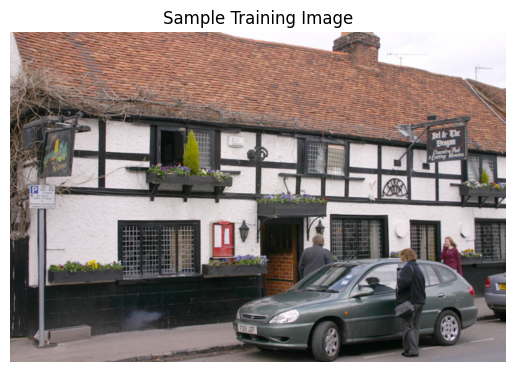

In [ ]:
img_path = f"{root}/images/train/00009e5b390986a0.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Sample Training Image")
plt.axis("off")
plt.show()

In [ ]:
yaml_content = """
path: /kaggle/input/large-license-plate-dataset
train: images/train
val: images/val
test: images/test
nc: 1
names: ['license_plate']
"""

with open("/kaggle/working/data.yaml", "w") as f:
    f.write(yaml_content)


In [ ]:
model = YOLO("yolov8n.pt")

In [25]:
model.train(
    data="/kaggle/working/data.yaml",
    epochs=50,
    imgsz=640,
    degrees=10,      # rotation
    scale=0.5,       # image scale
    shear=10,        # shear angle
    flipud=0.5,      # vertical flip prob
    fliplr=0.5,      # horizontal flip prob
    mosaic=1.0,      # mosaic augmentation prob
    mixup=0.2,       # mixup augmentation prob
)

Ultralytics 8.3.127 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=10, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=

train: Scanning /kaggle/input/large-license-plate-dataset/labels/train... 25470 images, 18 backgrounds, 0 corrupt: 100%|██████████| 25470/25470 [00:21<00:00, 1192.05it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/large-license-plate-dataset/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 220.3±78.0 MB/s, size: 293.3 KB)


val: Scanning /kaggle/input/large-license-plate-dataset/labels/val... 1073 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1073/1073 [00:00<00:00, 1216.75it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/large-license-plate-dataset/labels is not writeable, cache not saved.


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.94G      1.382      1.663      1.257         28        640: 100%|██████████| 1592/1592 [05:05<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.10it/s]


                   all       1073       1573       0.75      0.575      0.612       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.94G      1.349     0.9869      1.231         42        640: 100%|██████████| 1592/1592 [05:01<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  4.98it/s]

                   all       1073       1573      0.697       0.57      0.613       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.94G      1.386     0.9475      1.263         28        640: 100%|██████████| 1592/1592 [05:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.35it/s]


                   all       1073       1573      0.658      0.531      0.541      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.94G      1.386     0.9225      1.282         28        640: 100%|██████████| 1592/1592 [04:59<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.41it/s]

                   all       1073       1573       0.73      0.531      0.566      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.94G      1.344     0.8496      1.264         21        640: 100%|██████████| 1592/1592 [04:59<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.42it/s]

                   all       1073       1573      0.752      0.588      0.621      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.94G      1.316     0.8131      1.247         22        640: 100%|██████████| 1592/1592 [04:58<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.27it/s]

                   all       1073       1573      0.778      0.641      0.679      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.94G      1.305     0.7972      1.238         33        640: 100%|██████████| 1592/1592 [04:59<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.27it/s]

                   all       1073       1573      0.786      0.666      0.699      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.94G      1.289     0.7652      1.228         28        640: 100%|██████████| 1592/1592 [04:57<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.01it/s]

                   all       1073       1573      0.794      0.657      0.701      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.94G      1.274     0.7516      1.227         28        640: 100%|██████████| 1592/1592 [04:58<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.34it/s]

                   all       1073       1573      0.813      0.668      0.718      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.94G      1.272     0.7348      1.223         26        640: 100%|██████████| 1592/1592 [04:58<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  4.89it/s]

                   all       1073       1573      0.816       0.69      0.735      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.94G      1.262     0.7269      1.217         31        640: 100%|██████████| 1592/1592 [04:58<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.30it/s]

                   all       1073       1573      0.815      0.704       0.74      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.94G      1.253     0.7143      1.211         25        640: 100%|██████████| 1592/1592 [04:58<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.04it/s]

                   all       1073       1573      0.817      0.695       0.75      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.94G      1.246     0.7063      1.209         34        640: 100%|██████████| 1592/1592 [04:57<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.40it/s]

                   all       1073       1573      0.837      0.692      0.751      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.94G      1.238     0.6982      1.204         27        640: 100%|██████████| 1592/1592 [04:59<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.10it/s]

                   all       1073       1573      0.846      0.714      0.772      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.94G      1.238     0.6894      1.205         27        640: 100%|██████████| 1592/1592 [04:57<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.29it/s]

                   all       1073       1573      0.824      0.737      0.779      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.94G      1.223     0.6722      1.194         30        640: 100%|██████████| 1592/1592 [04:58<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.40it/s]

                   all       1073       1573      0.827      0.738       0.78      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.94G      1.219     0.6749      1.193         43        640: 100%|██████████| 1592/1592 [04:57<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.20it/s]

                   all       1073       1573      0.835       0.74      0.784      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.94G      1.218     0.6627       1.19         42        640: 100%|██████████| 1592/1592 [04:57<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.31it/s]

                   all       1073       1573      0.831      0.741      0.782      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.94G      1.211     0.6612      1.185         29        640: 100%|██████████| 1592/1592 [04:58<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.40it/s]

                   all       1073       1573      0.821      0.746      0.784       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.94G      1.206     0.6488      1.185         35        640: 100%|██████████| 1592/1592 [04:58<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.39it/s]

                   all       1073       1573      0.843      0.731      0.794      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.94G      1.201     0.6434      1.181         38        640: 100%|██████████| 1592/1592 [05:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.47it/s]

                   all       1073       1573      0.843      0.737      0.792      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.94G      1.199     0.6436      1.181         30        640: 100%|██████████| 1592/1592 [04:59<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.28it/s]

                   all       1073       1573      0.814      0.762      0.791        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.94G      1.192     0.6402      1.177         26        640: 100%|██████████| 1592/1592 [04:58<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.42it/s]

                   all       1073       1573      0.838       0.75      0.802       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.94G      1.188      0.631      1.174         31        640: 100%|██████████| 1592/1592 [04:58<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.31it/s]

                   all       1073       1573      0.839       0.76      0.802      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.94G      1.189     0.6279      1.174         31        640: 100%|██████████| 1592/1592 [04:56<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.18it/s]

                   all       1073       1573      0.836       0.76      0.804      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.94G      1.178     0.6182      1.172         30        640: 100%|██████████| 1592/1592 [04:55<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.31it/s]

                   all       1073       1573      0.841      0.748      0.803      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.94G      1.176     0.6182      1.166         29        640: 100%|██████████| 1592/1592 [04:56<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.04it/s]

                   all       1073       1573      0.824      0.775       0.81      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.94G      1.173     0.6095      1.161         28        640: 100%|██████████| 1592/1592 [04:57<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.36it/s]

                   all       1073       1573      0.848      0.747      0.805      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.94G      1.171     0.6048      1.162         29        640: 100%|██████████| 1592/1592 [05:02<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.01it/s]

                   all       1073       1573      0.857      0.752      0.812      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.94G       1.16      0.598      1.156         33        640: 100%|██████████| 1592/1592 [04:58<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.29it/s]

                   all       1073       1573      0.853      0.753      0.815       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.94G      1.161      0.593      1.156         29        640: 100%|██████████| 1592/1592 [04:55<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.40it/s]

                   all       1073       1573      0.865       0.75      0.816      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.94G      1.159     0.5942      1.151         25        640: 100%|██████████| 1592/1592 [04:56<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.18it/s]

                   all       1073       1573      0.861      0.749      0.813      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.94G      1.155     0.5864      1.153         38        640: 100%|██████████| 1592/1592 [04:57<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.33it/s]

                   all       1073       1573      0.856      0.755      0.816      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.94G      1.155     0.5803       1.15         21        640: 100%|██████████| 1592/1592 [04:56<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  4.98it/s]

                   all       1073       1573      0.856       0.76      0.816      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.94G       1.15     0.5812      1.151         28        640: 100%|██████████| 1592/1592 [05:01<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.21it/s]

                   all       1073       1573      0.859      0.757      0.815      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.94G      1.144     0.5748      1.147         25        640: 100%|██████████| 1592/1592 [05:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.17it/s]

                   all       1073       1573      0.852      0.762      0.817      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.94G      1.136     0.5714      1.143         16        640: 100%|██████████| 1592/1592 [04:58<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.34it/s]

                   all       1073       1573      0.843       0.77      0.819      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.94G      1.135     0.5668      1.143         31        640: 100%|██████████| 1592/1592 [04:56<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.10it/s]

                   all       1073       1573      0.845      0.772       0.82      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.94G       1.13     0.5611      1.141         26        640: 100%|██████████| 1592/1592 [04:58<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.21it/s]

                   all       1073       1573       0.85      0.771      0.822       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.94G      1.126     0.5556      1.136         26        640: 100%|██████████| 1592/1592 [05:02<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.20it/s]

                   all       1073       1573       0.85      0.771      0.824       0.43


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.94G      1.072     0.4517      1.127         18        640: 100%|██████████| 1592/1592 [04:09<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.34it/s]

                   all       1073       1573      0.846       0.77      0.821      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.94G       1.06     0.4414      1.129         16        640: 100%|██████████| 1592/1592 [04:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  4.99it/s]

                   all       1073       1573      0.847       0.77      0.824      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.94G       1.05     0.4321      1.121         15        640: 100%|██████████| 1592/1592 [04:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.06it/s]

                   all       1073       1573      0.851       0.77      0.826      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.94G      1.046     0.4276      1.114         15        640: 100%|██████████| 1592/1592 [04:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.47it/s]

                   all       1073       1573      0.861      0.761      0.825      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.94G      1.042     0.4226      1.116         15        640: 100%|██████████| 1592/1592 [04:08<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.41it/s]

                   all       1073       1573      0.861      0.764      0.826      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.94G      1.033      0.416      1.104         14        640: 100%|██████████| 1592/1592 [04:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.29it/s]

                   all       1073       1573       0.86      0.764      0.825      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.94G       1.03     0.4097      1.101         15        640: 100%|██████████| 1592/1592 [04:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.34it/s]

                   all       1073       1573      0.862      0.762      0.824      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.94G       1.02     0.4022      1.092         20        640: 100%|██████████| 1592/1592 [04:09<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.37it/s]

                   all       1073       1573      0.861      0.763      0.825      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.94G      1.015     0.3974      1.091         15        640: 100%|██████████| 1592/1592 [04:09<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.45it/s]

                   all       1073       1573       0.86      0.765      0.825      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.94G       1.01     0.3952      1.085         15        640: 100%|██████████| 1592/1592 [04:08<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.34it/s]

                   all       1073       1573      0.858      0.765      0.824      0.437



50 epochs completed in 4.103 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.70it/s]


                   all       1073       1573       0.86      0.764      0.825      0.437


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bb5347de850>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


image 1/1 /kaggle/input/large-license-plate-dataset/images/test/00723dac8201a83e.jpg: 480x640 2 license_plates, 34.2ms
Speed: 3.8ms preprocess, 34.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


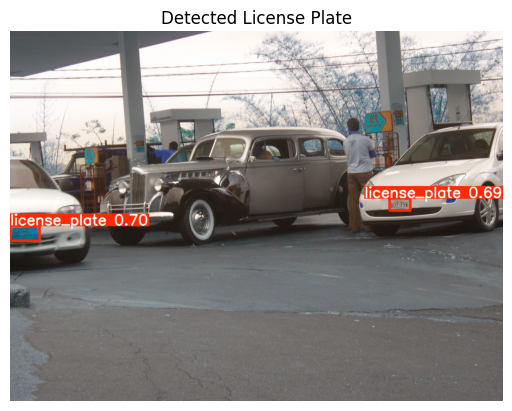

In [ ]:
img_path = f"{root}/images/test/00723dac8201a83e.jpg" 
result = model.predict(img_path, save=False)[0]

# Show YOLO Detection
plt.imshow(result.plot())
plt.title("Detected License Plate")
plt.axis("off")
plt.show()

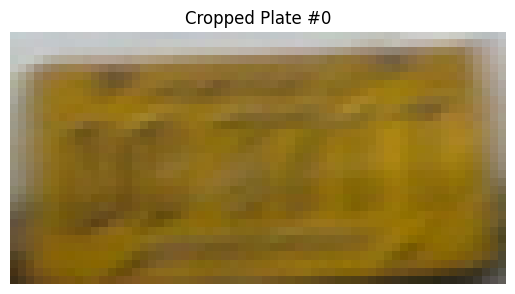

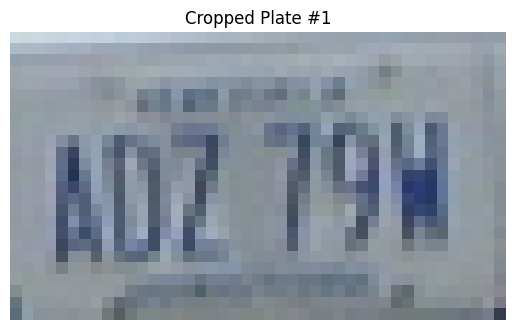

In [ ]:
boxes = result.boxes.xyxy.cpu().numpy().astype(int)
original = cv2.imread(img_path)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

for i, (x1, y1, x2, y2) in enumerate(boxes):
    cropped = original[y1:y2, x1:x2]
    plt.imshow(cropped)
    plt.title(f"Cropped Plate #{i}")
    plt.axis("off")
    plt.show()

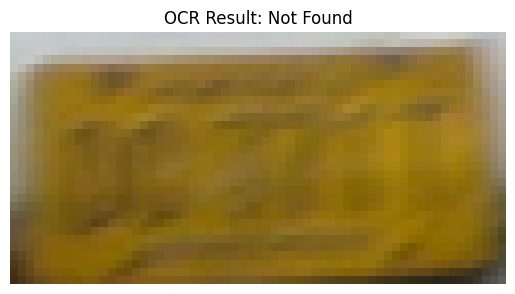

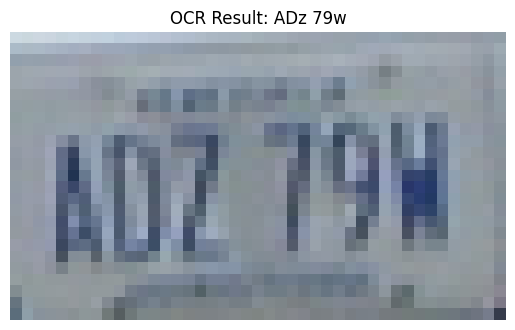

In [ ]:
reader = easyocr.Reader(['en'])

for i, (x1, y1, x2, y2) in enumerate(boxes):
    cropped = original[y1:y2, x1:x2]
    result_ocr = reader.readtext(cropped)

    text = result_ocr[0][1] if result_ocr else "Not Found"
    plt.imshow(cropped)
    plt.axis("off")
    plt.title(f"OCR Result: {text}")
    plt.show()

In [ ]:
def clean_text(text):
    import re
    return re.sub(r'[^A-Z0-9]', '', text.upper())

# Example
cleaned = clean_text(text)
print("Cleaned Text:", cleaned)

Cleaned Text: ADZ79W


In [ ]:
df = pd.DataFrame({
    'image': ['sample_test.jpg'],
    'license_plate': [cleaned]
})
df.to_csv("predictions.csv", index=False)
df.head()

,image,license_plate
0,sample_test.jpg,ADZ79W
